# 글씨체 찾기 프로젝트

In [85]:
import numpy as np
from keras.preprocessing.image import *
from keras.applications.vgg16 import VGG16, decode_predictions
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import *
import pandas as pd
from keras.models import Sequential
from keras.layers import *

In [86]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=15,#0~15,
                  width_shift_range=0.1,#좌우로 각각10픽셀 이내
                  height_shift_range=0.2,#상하로
                  shear_range=0.5, #변형
                  zoom_range=[1.0,3.0],#최소 0.8배 최대 2배
                  horizontal_flip=True,
                  vertical_flip=True)

In [87]:
img = load_img('안녕하세요/junga.1.png')
x = img_to_array(img) # shape => (24, 24, 3)
x= x.reshape((1,) + x.shape) # 앞에 1은 이미지가 한개 임

In [88]:
i = 1
for batch in train_datagen.flow(x, batch_size = 1 , save_to_dir='mywriting', save_prefix = '정아', save_format = 'png'):
    if i >50:
        break
    i += 1

In [89]:
img = load_img('안녕하세요/woobin.1.png')
x = img_to_array(img) # shape => (24, 24, 3)
x= x.reshape((1,) + x.shape) # 앞에 1은 이미지가 한개 임

In [90]:
i = 1
for batch in train_datagen.flow(x, batch_size = 1 , save_to_dir='mywriting', save_prefix = '우빈', save_format = 'png'):
    if i >50:
        break
    i += 1

# VGG 적용

In [91]:
vgg = VGG16()
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# 파일크기 적용

In [92]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL = 3

In [93]:
filenames=os.listdir("mywriting")
filenames

['우빈_0_1053.png',
 '우빈_0_1123.png',
 '우빈_0_1267.png',
 '우빈_0_1562.png',
 '우빈_0_1815.png',
 '우빈_0_1954.png',
 '우빈_0_2163.png',
 '우빈_0_226.png',
 '우빈_0_2326.png',
 '우빈_0_2749.png',
 '우빈_0_2985.png',
 '우빈_0_3502.png',
 '우빈_0_3533.png',
 '우빈_0_370.png',
 '우빈_0_4008.png',
 '우빈_0_4378.png',
 '우빈_0_453.png',
 '우빈_0_4570.png',
 '우빈_0_4670.png',
 '우빈_0_4694.png',
 '우빈_0_4723.png',
 '우빈_0_4813.png',
 '우빈_0_5049.png',
 '우빈_0_5152.png',
 '우빈_0_5230.png',
 '우빈_0_5242.png',
 '우빈_0_5391.png',
 '우빈_0_5441.png',
 '우빈_0_5463.png',
 '우빈_0_5481.png',
 '우빈_0_5482.png',
 '우빈_0_5709.png',
 '우빈_0_5886.png',
 '우빈_0_5934.png',
 '우빈_0_6193.png',
 '우빈_0_6275.png',
 '우빈_0_6431.png',
 '우빈_0_6544.png',
 '우빈_0_6697.png',
 '우빈_0_6909.png',
 '우빈_0_6954.png',
 '우빈_0_7796.png',
 '우빈_0_8274.png',
 '우빈_0_8344.png',
 '우빈_0_8368.png',
 '우빈_0_8666.png',
 '우빈_0_881.png',
 '우빈_0_936.png',
 '우빈_0_9734.png',
 '우빈_0_9851.png',
 '정아_0_1071.png',
 '정아_0_2024.png',
 '정아_0_2152.png',
 '정아_0_2153.png',
 '정아_0_2363.png',
 '정아_0_2396.png

In [94]:
categories = []
for fn in filenames: 
    category = fn.split('_')[0]
    if category == '정아':
        categories.append(1)
    else:
        categories.append(0)

# 데이터 프레임화 하기

In [95]:
df = pd.DataFrame({'filenames': filenames, 'category': categories})
df

,filenames,category
0,우빈_0_1053.png,0
1,우빈_0_1123.png,0
2,우빈_0_1267.png,0
3,우빈_0_1562.png,0
4,우빈_0_1815.png,0
...,...,...
96,정아_0_9569.png,1
97,정아_0_9673.png,1
98,정아_0_9820.png,1
99,정아_0_9873.png,1


# 카테고리 별 개수확인

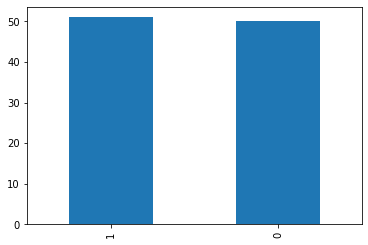

In [96]:
df['category'].value_counts().plot.bar()

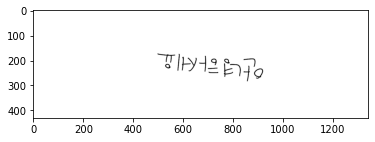

In [97]:
sample = random.choice(filenames)
img = load_img('mywriting/'+sample)
plt.imshow(img)

In [98]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNEL)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.55))
model.add(Dense(2, activation = 'sigmoid'))

In [99]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'] )
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 128)      

In [100]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
lrr = ReduceLROnPlateau(monitor = 'val_acc', patience = 2, facrtor = 0.5,  mim_lr = 0.00001)
callback = [earlystop, lrr]

In [101]:
df['category'] = df['category'].replace({0:'우빈', 1:'정아'})

In [102]:
trainDf, valDF = train_test_split(df, test_size = 0.2, random_state = 42)
trainDf['category'].value_counts()

정아    42
우빈    38
Name: category, dtype: int64

In [103]:
totalTrain = trainDf.shape[0]
totalVal = valDF.shape[0]
batch_size = 4

In [104]:
trainDf.head() #데티어 프레임으로 저장됨

trainDf = trainDf.reset_index(drop =True)
valDF = valDF.reset_index(drop = True)

In [111]:
trainDatagen = ImageDataGenerator(rotation_range= 15 , rescale = 1./255, shear_range=0.1, zoom_range=0.5, horizontal_flip=False, width_shift_range=0.1, height_shift_range=0.1)

trainGenerator = trainDatagen.flow_from_dataframe(trainDf, 'mywriting/', x_col='filenames', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size= batch_size)

Found 80 validated image filenames belonging to 2 classes.


In [112]:
validDatagen = ImageDataGenerator(rescale = 1./255)

vaildGenerator = trainDatagen.flow_from_dataframe(trainDf, 'mywriting/', x_col='filenames', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size= batch_size)

Found 80 validated image filenames belonging to 2 classes.


In [113]:
exampleDf = trainDf.sample(1).reset_index(drop = True)


exampleGenerator = trainDatagen.flow_from_dataframe(exampleDf, 'mywriting/', x_col='filenames', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size= batch_size)

Found 1 validated image filenames belonging to 1 classes.


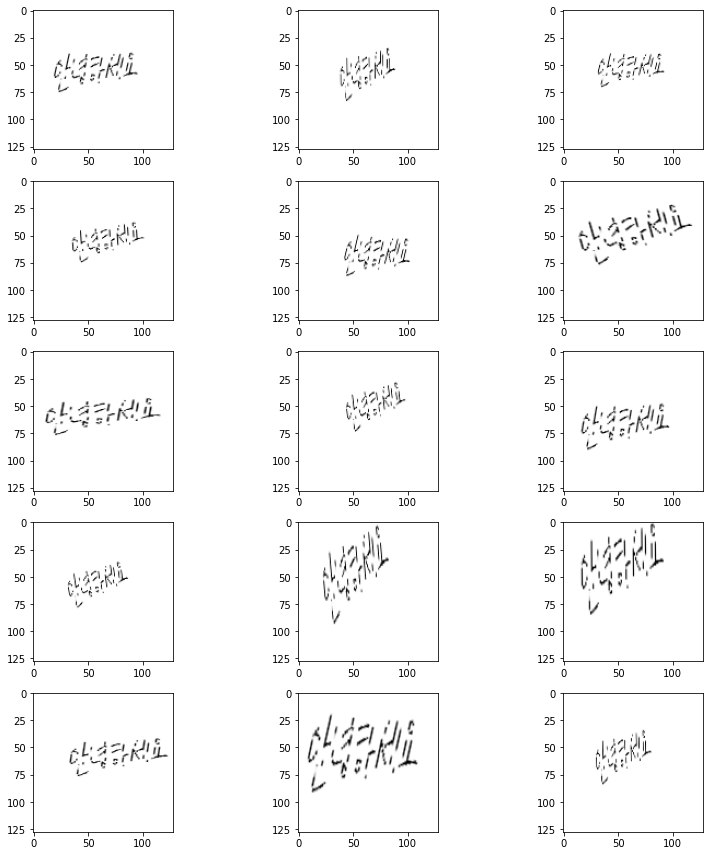

In [114]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5,3,i+1)
    for xb, yb in exampleGenerator:
        img = xb[0]
        plt.imshow(img)
        break
plt.tight_layout()
plt.show()

In [115]:
totalTrain = trainDf.shape[0]
totalValid = valDF.shape[0]
print(totalTrain, totalValid)

80 21


In [116]:
epochs = 8
history = model.fit_generator(
    trainGenerator, 
    epochs= epochs,
    validation_data = vaildGenerator,
    validation_steps=totalValid//batch_size,
    steps_per_epoch=totalTrain//batch_size,
    callbacks = callback
)

Epoch 1/8
20/20 [==============================] - 4s 215ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 2/8
20/20 [==============================] - 4s 210ms/step - loss: 0.6931 - accuracy: 0.4375 - val_loss: 0.6931 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 3/8
20/20 [==============================] - 4s 209ms/step - loss: 0.6931 - accuracy: 0.4625 - val_loss: 0.6932 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 4/8
20/20 [==============================] - 4s 212ms/step - loss: 0.6931 - accuracy: 0.4875 - val_loss: 0.6931 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 5/8
20/20 [==============================] - 4s 209ms/step - loss: 0.6931 - accuracy: 0.4875 - val_loss: 0.6932 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 6/8
20/20 [==============================] - 4s 210ms/step - loss: 0.6931 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 7/8
20/20 [==============================] - 4s 213ms/step - loss: 0.6